# Importing Necessary python Library

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
# importing pandas & Numpy Library for data Exploring and analysis
import pandas as pd
import numpy as np

# importing Library for data-preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, LabelEncoder

# importing machine-learning algorithms for Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

# Grid Search CV import
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score # for K-fold Cross - validtion
from sklearn.model_selection import KFold # for K-fold Cross - validtion

# train-test Split
from sklearn.model_selection import train_test_split

#import for Evaluation Metrix for regression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

# importing for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [18]:
df = pd.read_csv('Housing.csv')

In [19]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [20]:
list(df)

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [21]:
df= df[[
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus',
 'price']]

In [22]:
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


# Loading Data Checking

In [23]:
df.isnull().sum()

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64

In [24]:
df.dtypes

area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
price                int64
dtype: object

In [25]:
df.describe()

,area,bedrooms,bathrooms,stories,parking,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


In [27]:
for colname in list(df):
  le = LabelEncoder()
  if df[colname].dtype == 'object':
    df[colname] = le.fit_transform(df[colname])

In [28]:
df.dtypes

area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
price               int64
dtype: object

In [29]:
df.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.330000e+07


# Exploratory Data Analysis (EDA):

In [30]:
df.skew(axis=0)

area                1.321188
bedrooms            0.495684
bathrooms           1.589264
stories             1.082088
mainroad           -2.065410
guestroom           1.688419
basement            0.628590
hotwaterheating     4.353428
airconditioning     0.795748
parking             0.842062
prefarea            1.254361
furnishingstatus   -0.117666
price               1.212239
dtype: float64

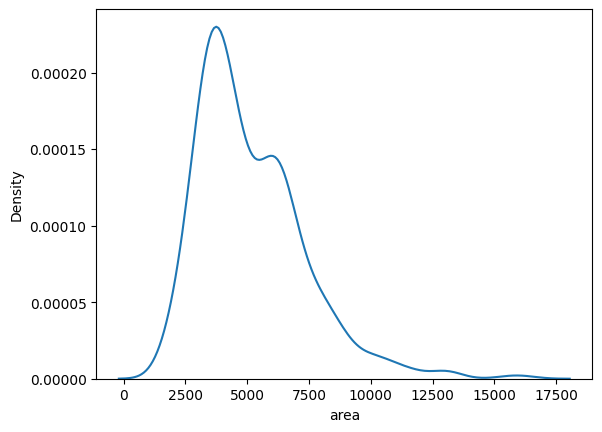

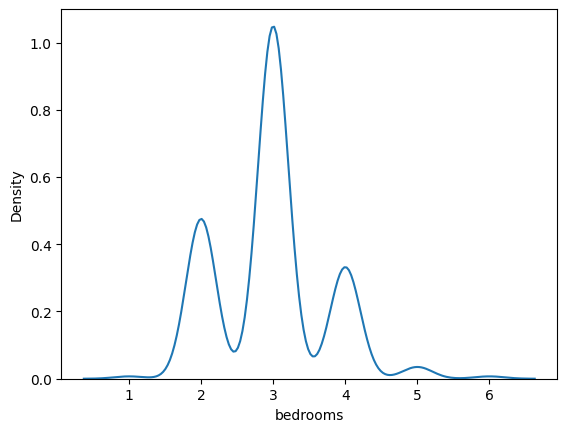

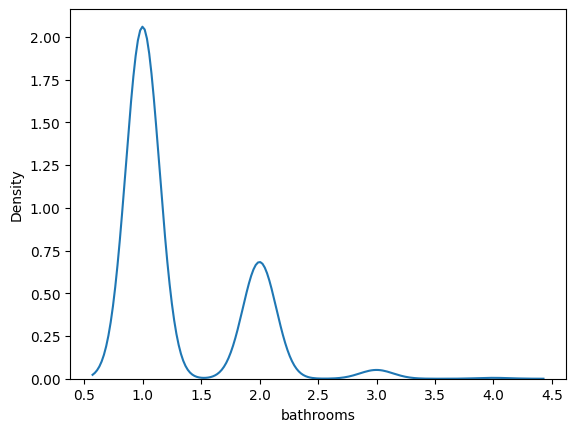

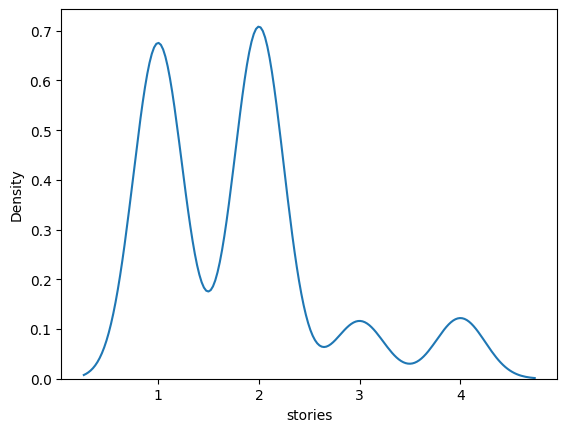

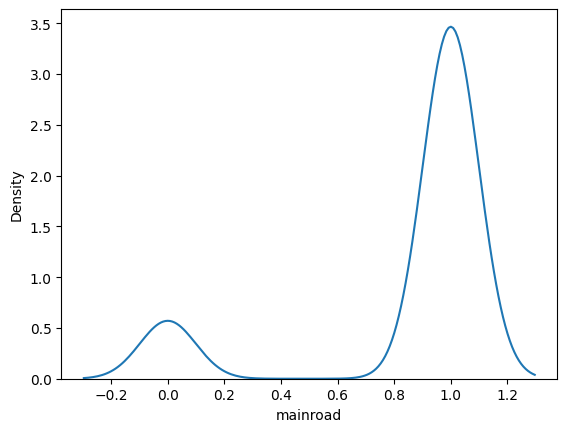

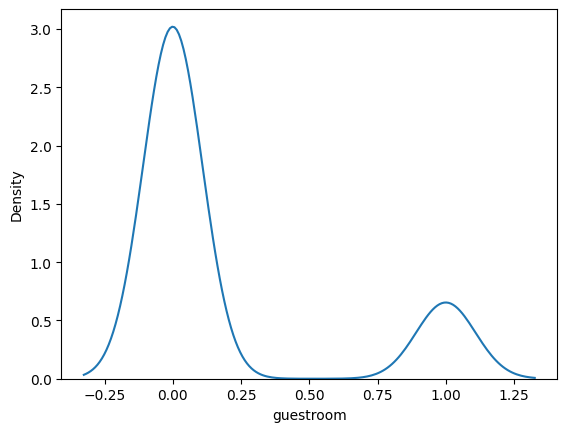

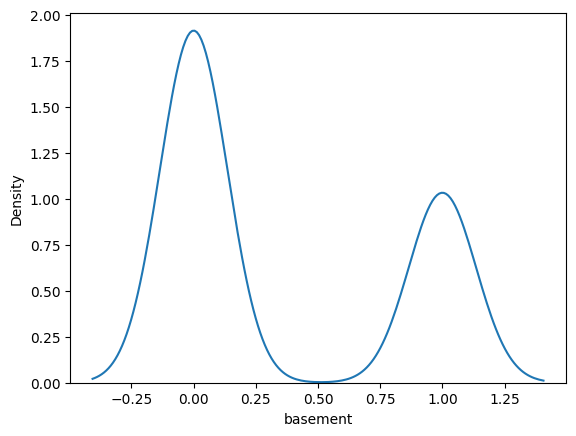

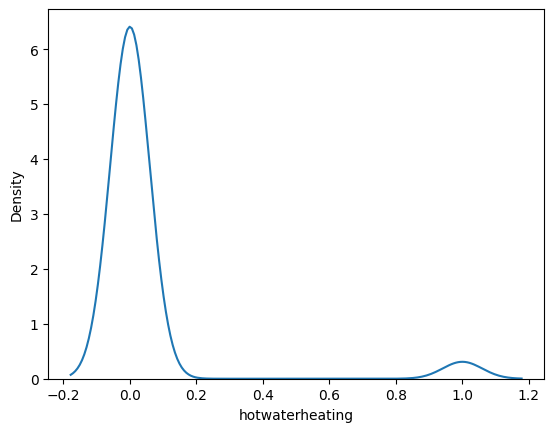

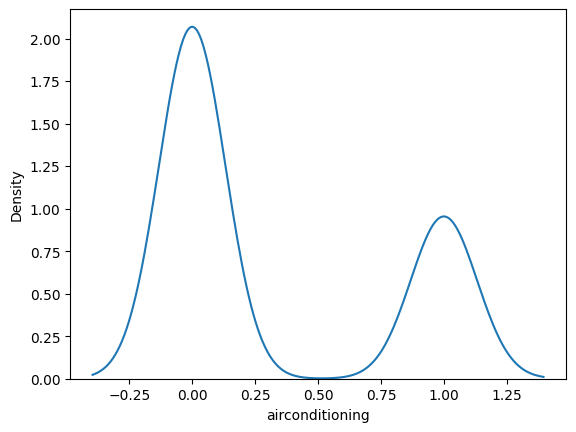

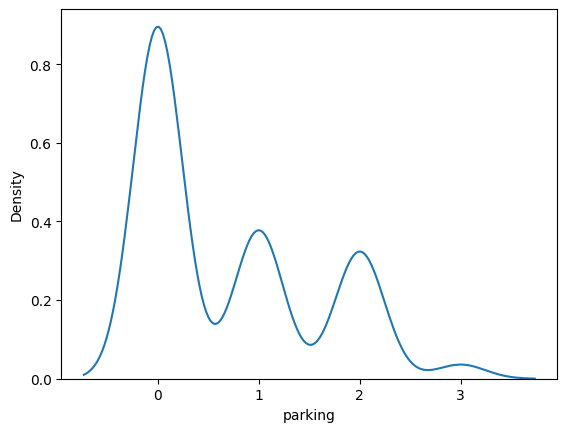

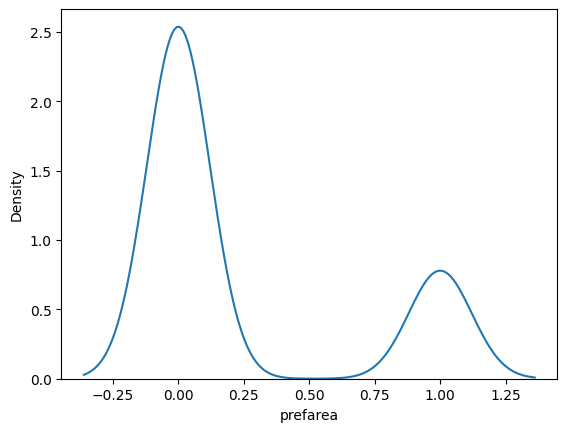

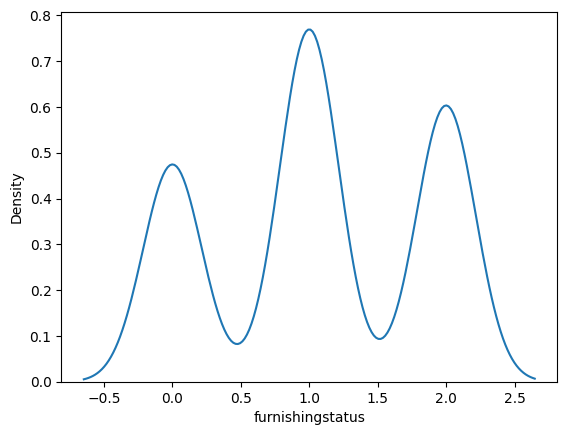

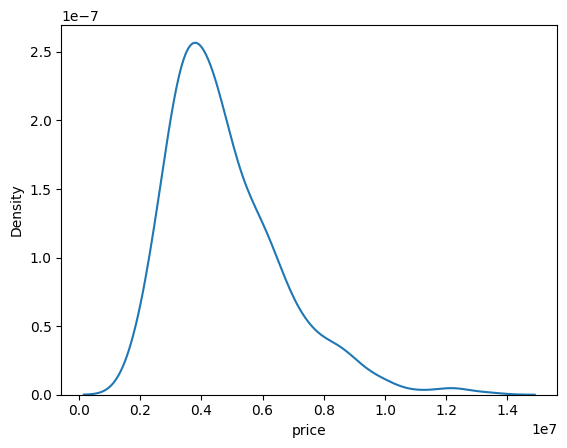

In [31]:
for colname in list(df):
  sns.kdeplot(df[colname])
  plt.show()

In [32]:
preprocessor = {
    'StandardScaler':StandardScaler(),
    'MinMaxScaler':MinMaxScaler(),
    'MaxAbsScaler':MaxAbsScaler(),
    'NotProcessing' : 'NotProcessing'
}

In [33]:
for key_ in preprocessor:
  print(key_,preprocessor[key_])

StandardScaler StandardScaler()
MinMaxScaler MinMaxScaler()
MaxAbsScaler MaxAbsScaler()
NotProcessing NotProcessing


In [35]:
ml_algorithms = {
    'DecisionTree' : DecisionTreeRegressor(random_state=42),
    'RandomForest' : RandomForestRegressor(random_state=42),
    'KNearestNeighbor' : KNeighborsRegressor(),
    'SVR' : SVR(),
    'LinearRegression' : LinearRegression()
}

In [36]:
for key_ in ml_algorithms:
  print(key_,ml_algorithms[key_])

DecisionTree DecisionTreeRegressor(random_state=42)
RandomForest RandomForestRegressor(random_state=42)
KNearestNeighbor KNeighborsRegressor()
SVR SVR()
LinearRegression LinearRegression()


In [37]:
ml_algorithms_param = {
    'DecisionTree' : {
    'criterion' : ['squared_error', 'friedman_mse','absolute_error','poisson'],
    'splitter' : ['best', 'random'],
    'max_depth' : [6,8,10],
    'max_features' : ['sqrt','log2',None]
},
    'RandomForest' : {
    'criterion' : ['squared_error', 'friedman_mse', 'poisson'],
    'n_estimators' : [300,400]
},
    'KNearestNeighbor' : {
    'n_neighbors': [3,5,7,9,11,13,15,17,19],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
},
    'SVR' : {
    'C':[0.1,1,100],
    'kernel':['rbf','linear'],
    'gamma':['scale','auto',0.01,.1,1]
    },
    'LinearRegression' : {

    }
}

In [38]:
for key_ in ml_algorithms_param:
  print(key_,ml_algorithms_param[key_])

DecisionTree {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'splitter': ['best', 'random'], 'max_depth': [6, 8, 10], 'max_features': ['sqrt', 'log2', None]}
RandomForest {'criterion': ['squared_error', 'friedman_mse', 'poisson'], 'n_estimators': [300, 400]}
KNearestNeighbor {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
SVR {'C': [0.1, 1, 100], 'kernel': ['rbf', 'linear'], 'gamma': ['scale', 'auto', 0.01, 0.1, 1]}
LinearRegression {}


In [39]:
for key_ in ml_algorithms:
  print(key_,ml_algorithms_param[key_])

DecisionTree {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'splitter': ['best', 'random'], 'max_depth': [6, 8, 10], 'max_features': ['sqrt', 'log2', None]}
RandomForest {'criterion': ['squared_error', 'friedman_mse', 'poisson'], 'n_estimators': [300, 400]}
KNearestNeighbor {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
SVR {'C': [0.1, 1, 100], 'kernel': ['rbf', 'linear'], 'gamma': ['scale', 'auto', 0.01, 0.1, 1]}
LinearRegression {}


In [40]:
collen = len(list(df))

In [41]:
all_results = []

for preprocessing_key_ in preprocessor:

  #separate Feature & target Variable
  X = df.values[:,0:collen-1]
  y = df.values[:,collen-1]

  if preprocessing_key_ != 'NotProcessing':
    # pre-processing value with pre-processor
    scaler = preprocessor[preprocessing_key_]
    scaler.fit(X)
    X = scaler.transform(X)

  for ml_algo_param_key_ in ml_algorithms:

    result = []

    ml_class = ml_algorithms[ml_algo_param_key_]
    ml_param = ml_algorithms_param[ml_algo_param_key_]

    # call grid Search CV class
    grid_cv = GridSearchCV(estimator=ml_class,param_grid=ml_param,verbose=3)
    grid_cv.fit(X,y)

    result.append(preprocessing_key_)
    result.append(ml_algo_param_key_)
    result.append(grid_cv.best_params_)
    result.append(round(grid_cv.best_score_ * 100,3))

    print(result)

    all_results.append(result)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END criterion=squared_error, max_depth=6, max_features=sqrt, splitter=best;, score=-3.537 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=6, max_features=sqrt, splitter=best;, score=-15.202 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=6, max_features=sqrt, splitter=best;, score=-32.122 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=6, max_features=sqrt, splitter=best;, score=-23.905 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=6, max_features=sqrt, splitter=best;, score=-12.510 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=6, max_features=sqrt, splitter=random;, score=-3.889 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=6, max_features=sqrt, splitter=random;, score=-8.051 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=6, max_features=sqrt, splitter=random;, score=-23.489 to

In [42]:
AllGiidSearchResult = pd.DataFrame(all_results,columns=['Data Processing','Algorithm','best_parameter','best_score'])

In [43]:
AllGiidSearchResult.sort_values('best_score',ascending=False,inplace=True)

In [44]:
AllGiidSearchResult = AllGiidSearchResult.reset_index(drop=True)

In [45]:
AllGiidSearchResult

,Data Processing,Algorithm,best_parameter,best_score
0,NotProcessing,LinearRegression,{},-991.068
1,MaxAbsScaler,LinearRegression,{},-991.068
2,StandardScaler,LinearRegression,{},-991.068
3,MinMaxScaler,LinearRegression,{},-991.068
4,StandardScaler,KNearestNeighbor,"{'algorithm': 'brute', 'n_neighbors': 19, 'wei...",-1009.385
5,MaxAbsScaler,RandomForest,"{'criterion': 'poisson', 'n_estimators': 300}",-1155.593
6,NotProcessing,RandomForest,"{'criterion': 'poisson', 'n_estimators': 300}",-1160.362
7,MinMaxScaler,RandomForest,"{'criterion': 'poisson', 'n_estimators': 300}",-1160.713
8,StandardScaler,RandomForest,"{'criterion': 'poisson', 'n_estimators': 300}",-1163.104
9,MinMaxScaler,KNearestNeighbor,"{'algorithm': 'auto', 'n_neighbors': 19, 'weig...",-1186.355


In [46]:
AllGiidSearchResult['RN'] = AllGiidSearchResult.sort_values(['best_score'], ascending=[False]).groupby(['Algorithm']).cumcount() + 1

In [47]:
AllGiidSearchResult

,Data Processing,Algorithm,best_parameter,best_score,RN
0,NotProcessing,LinearRegression,{},-991.068,1
1,MaxAbsScaler,LinearRegression,{},-991.068,2
2,StandardScaler,LinearRegression,{},-991.068,3
3,MinMaxScaler,LinearRegression,{},-991.068,4
4,StandardScaler,KNearestNeighbor,"{'algorithm': 'brute', 'n_neighbors': 19, 'wei...",-1009.385,1
5,MaxAbsScaler,RandomForest,"{'criterion': 'poisson', 'n_estimators': 300}",-1155.593,1
6,NotProcessing,RandomForest,"{'criterion': 'poisson', 'n_estimators': 300}",-1160.362,2
7,MinMaxScaler,RandomForest,"{'criterion': 'poisson', 'n_estimators': 300}",-1160.713,3
8,StandardScaler,RandomForest,"{'criterion': 'poisson', 'n_estimators': 300}",-1163.104,4
9,MinMaxScaler,KNearestNeighbor,"{'algorithm': 'auto', 'n_neighbors': 19, 'weig...",-1186.355,2


In [48]:
AllGiidSearchResult[AllGiidSearchResult['RN'] == 1]['best_parameter'].values

array([{},
       {'algorithm': 'brute', 'n_neighbors': 19, 'weights': 'uniform'},
       {'criterion': 'poisson', 'n_estimators': 300},
       {'C': 100, 'gamma': 'scale', 'kernel': 'linear'},
       {'criterion': 'squared_error', 'max_depth': 6, 'max_features': 'sqrt', 'splitter': 'random'}],
      dtype=object)

# Result for LinearRegession using MinMaxScaler

In [49]:
X = df.values[:,0:collen - 1]
y = df.values[:,collen - 1]

In [50]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [52]:
clf = LinearRegression()
clf.fit(X_train,y_train)
y_pred_test = clf.predict(X_test)

In [53]:
mean_absolute_error_ = round(mean_absolute_error(y_test,y_pred_test),2)
mean_absolute_percentage_error_ = round(mean_absolute_percentage_error(y_test,y_pred_test) * 100,2)
root_mean_squared_error_ = round(mean_squared_error(y_test,y_pred_test,squared=False),2)
r2_score_ = round(r2_score(y_test,y_pred_test),2)

print("Mean Absoulate Error : {}".format(mean_absolute_error_))
print("Mean Absoulate Percentage Error : {}".format(mean_absolute_percentage_error_))
print("Root Mean Square Error : {}".format(root_mean_squared_error_))
print("R Square Error : {}".format(r2_score_))

Mean Absoulate Error : 919520.65
Mean Absoulate Percentage Error : 20.97
Root Mean Square Error : 1249024.76
R Square Error : 0.66


<Axes: ylabel='Density'>

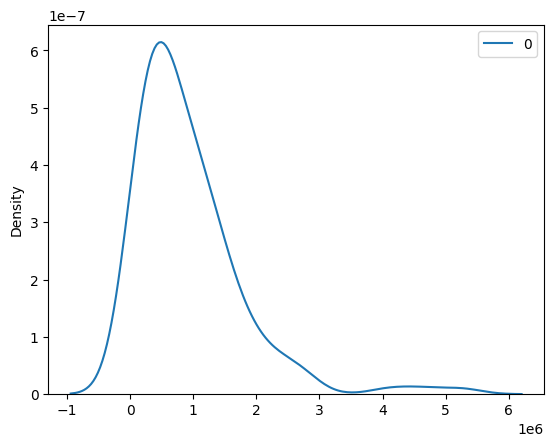

In [54]:
sns.kdeplot(pd.DataFrame(abs(y_test-y_pred_test)))